<a href="https://colab.research.google.com/github/orin00/colab/blob/main/240229_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# 정부에서 만드는 데이터들은 전부 공개됨.
# 기상청 https://data.kma.go.kr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ta_20240229153903.csv', encoding='cp949', skiprows=6)
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2013-02-28,112,6.2,-0.5,13.4
1,\t2013-03-01,112,0.3,-1.7,7.2
2,\t2013-03-02,112,-1.0,-3.9,2.5
3,\t2013-03-03,112,0.3,-2.8,3.7
4,\t2013-03-04,112,3.1,0.1,7.8


In [48]:
df.shape

(4018, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       4018 non-null   object 
 1   지점       4018 non-null   int64  
 2   평균기온(℃)  4018 non-null   float64
 3   최저기온(℃)  4018 non-null   float64
 4   최고기온(℃)  4018 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 157.1+ KB


In [50]:
# 날짜를 datetime으로 바꾼다.
# replace

df['날짜'] = df['날짜'].str.replace('\t','')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2013-02-28,112,6.2,-0.5,13.4
1,2013-03-01,112,0.3,-1.7,7.2
2,2013-03-02,112,-1.0,-3.9,2.5
3,2013-03-03,112,0.3,-2.8,3.7
4,2013-03-04,112,3.1,0.1,7.8


In [52]:
df.columns = ['date', 'local', 'avg', 'min', 'max']
# # df.rename(columns = {'날짜':'date', '지점':'local', '평균기온(℃)': 'avg', '최저기온(℃)': 'min', '최고기온(℃)':'max'}, inplace=True)
df

,date,local,avg,min,max
0,2013-02-28,112,6.2,-0.5,13.4
1,2013-03-01,112,0.3,-1.7,7.2
2,2013-03-02,112,-1.0,-3.9,2.5
3,2013-03-03,112,0.3,-2.8,3.7
4,2013-03-04,112,3.1,0.1,7.8
...,...,...,...,...,...
4013,2024-02-24,112,2.3,-0.5,6.0
4014,2024-02-25,112,2.4,0.7,5.5
4015,2024-02-26,112,3.8,-0.3,8.0
4016,2024-02-27,112,5.6,1.8,9.6


In [39]:
# # df['date'] = df['date'].str.replace('\t','')
# split_data = df['date'].str.split('\t')
# split_data

0       [2013-02-28]
1       [2013-03-01]
2       [2013-03-02]
3       [2013-03-03]
4       [2013-03-04]
            ...     
4013    [2024-02-24]
4014    [2024-02-25]
4015    [2024-02-26]
4016    [2024-02-27]
4017    [2024-02-28]
Name: date, Length: 4018, dtype: object

In [46]:
# from ast import pattern
# import re
# pettern = re.compile('\S')
# df['date2'] = df['date'].apply(lambda x : ''.join(pettern.findall(x)))
# df.head()

# # 인덱싱 방법
# df['date3'] = df['date'].apply(lambda x : x[0:])
# df.head()

,date,local,avg,min,max,date2,date3
0,2013-02-28,112,6.2,-0.5,13.4,2013-02-28,2013-02-28
1,2013-03-01,112,0.3,-1.7,7.2,2013-03-01,2013-03-01
2,2013-03-02,112,-1.0,-3.9,2.5,2013-03-02,2013-03-02
3,2013-03-03,112,0.3,-2.8,3.7,2013-03-03,2013-03-03
4,2013-03-04,112,3.1,0.1,7.8,2013-03-04,2013-03-04


In [54]:
df.describe()

,local,avg,min,max
count,4018.0,4018.000000,4018.000000,4018.000000
mean,112.0,12.964335,9.752514,16.706720
std,0.0,10.080090,10.297998,10.100954
min,112.0,-14.600000,-17.500000,-11.900000
25%,112.0,4.500000,1.000000,8.100000
50%,112.0,13.900000,10.350000,18.100000
75%,112.0,22.000000,18.900000,25.500000
max,112.0,31.800000,29.100000,36.000000


In [57]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4018 non-null   datetime64[ns]
 1   local   4018 non-null   int64         
 2   avg     4018 non-null   float64       
 3   min     4018 non-null   float64       
 4   max     4018 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [65]:
# 가장 더웠던 온도를 찾고 그 날짜를 출력하시오.
# 최고 기온이 가장 높은날
max_temp = df['max'].max()
max_temp
max_date = df[df['max'] == max_temp]['date']
print('가장 더웠던 날짜 :', max_date.astype('str').values[0],'온도 :', max_temp)

가장 더웠던 날짜 : 2019-08-10 온도 : 36.0


In [68]:
# 가장 추웠던 온도를 찾고 그 날짜를 출력하시오.
min_temp = df['min'].min()
min_temp
min_date = df[df['min'] == min_temp]['date']
print('가장 추웠던 날짜 :', min_date.astype('str').values[0],'온도 :', min_temp)

가장 추웠던 날짜 : 2021-01-08 온도 : -17.5


In [71]:
# 일교차가 가장 큰 날 찾기
df['diff'] = df['max'] - df['min']
df.head()
diff_temp = df['diff'].max()
diff_date = df[df['diff'] == diff_temp]
diff_date
print('일교차가 가장 큰날 :', diff_date.iloc[0,0],'온도차 :', diff_temp)

일교차가 가장 큰날 : 2022-11-29 00:00:00 온도차 : 16.2


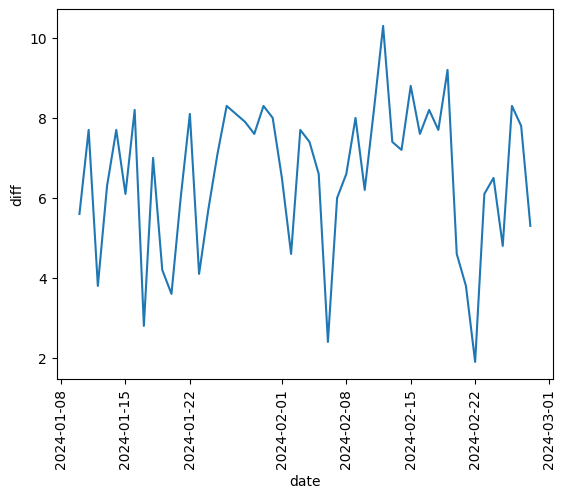

In [94]:
# 최근 50일에 대한 일교차 그래프를 생성하시오.
df.sort_values(by='date', ascending=True, inplace=True)
sns.lineplot(x=df['date'].tail(50), y=df['diff'].tail(50))
plt.xticks(rotation=90)
plt.show()

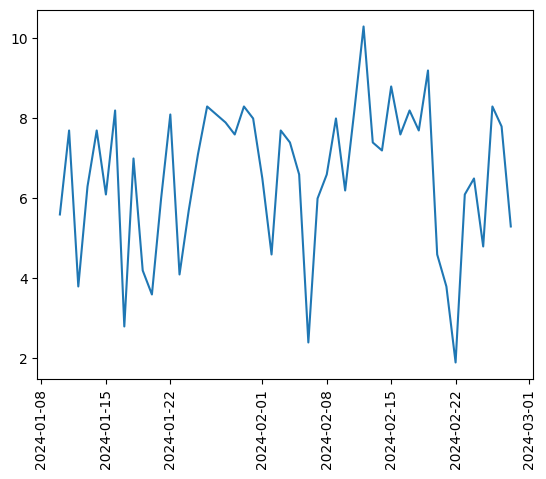

In [98]:
df_50 = df[-50:]
df_50

plt.plot(df_50['date'],df_50['diff'])
plt.xticks(rotation=90)
plt.show()

In [112]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

def season(x):
  if x <= 3:
    x = str(x).replace(str(x), 'Winter')
  elif x <= 6:
    x = str(x).replace(str(x), 'Spring')
  elif x <= 9:
    x = str(x).replace(str(x), 'Summer')
  else:
    x = str(x).replace(str(x), 'Fall')
  return x


df['Season'] = df['month'].apply(season)

li = []
for i in df['month']:
  li.append(season(i))
df['Season0'] = li


In [108]:
df_max = df.groupby(['year','Season']).max()
df_max

date  local   avg   min   max  diff  month Season0
year Season                                                         
2013 Fall   2013-12-31    112  22.6  20.2  26.3  11.1     12    Fall
     Spring 2013-06-30    112  25.6  21.6  30.2  12.1      6  Spring
     Summer 2013-09-30    112  28.3  26.9  32.0  10.3      9  Summer
     Winter 2013-03-31    112  11.5   5.4  20.4  15.0      3  Winter
2014 Fall   2014-12-31    112  21.0  17.3  27.5  14.5     12    Fall
     Spring 2014-06-30    112  23.8  21.1  28.9  12.6      6  Spring
     Summer 2014-09-30    112  30.8  28.3  35.3  10.3      9  Summer
     Winter 2014-03-31    112  14.8  12.0  21.5  13.7      3  Winter
2015 Fall   2015-12-31    112  19.7  16.8  24.0  12.2     12    Fall
     Spring 2015-06-30    112  24.0  21.0  28.6  15.2      6  Spring
     Summer 2015-09-30    112  28.9  25.5  33.1  11.5      9  Summer
     Winter 2015-03-31    112  12.4   9.3  17.6  14.3      3  Winter
2016 Fall   2016-12-31    112  22.4  18.8  27.7  10.9     12    Fall
     Spring 2016-06-30    112  24.1  21.8  29.3  15.8      6  Spring
     Summer 2016-09-30    112  29.8  27.4  34.0  10.4      9  Summer
     Winter 2016-03-31    112  13.5   8.4  19.5  12.4      3  Winter
2017 Fall   2017-12-31    112  21.2  19.1  26.0  11.4     12    Fall
     Spring 2017-06-30    112  24.4  21.5  29.4  13.1      6  Spring
     Summer 2017-09-30    112  30.9  27.6  34.0   9.5      9  Summer
     Winter 2017-03-31    112   9.5   7.1  15.6  11.8      3  Winter
2018 Fall   2018-12-31    112  20.1  16.2  24.7  10.1     12    Fall
     Spring 2018-06-30    112  24.7  20.3  29.0  13.2      6  Spring
     Summer 2018-09-30    112  31.8  29.1  35.9  10.9      9  Summer
     Winter 2018-03-31    112  15.5  12.4  19.5  13.0      3  Winter
2019 Fall   2019-12-31    112  23.1  20.3  27.5  12.9     12    Fall
     Spring 2019-06-30    112  24.4  21.8  28.7  15.2      6  Spring
     Summer 2019-09-30    112  31.4  28.2  36.0  11.7      9  Summer
     Winter 2019-03-31    112  10.1   7.0  14.4  13.3      3  Winter
2020 Fall   2020-12-31    112  19.6  17.9  22.4  12.4     12    Fall
     Spring 2020-06-30    112  25.7  21.4  31.7  13.9      6  Spring
     Summer 2020-09-30    112  30.0  27.0  33.9  10.1      9  Summer
     Winter 2020-03-31    112  14.7  10.2  19.9  11.6      3  Winter
2021 Fall   2021-12-31    112  23.5  21.6  26.9  13.1     12    Fall
     Spring 2021-06-30    112  24.6  22.2  29.8  14.4      6  Spring
     Summer 2021-09-30    112  30.6  27.5  34.5   9.1      9  Summer
     Winter 2021-03-31    112  12.7  10.1  19.0  14.2      3  Winter
2022 Fall   2022-12-31    112  21.9  19.2  23.2  16.2     12    Fall
     Spring 2022-06-30    112  25.8  24.5  29.2  12.6      6  Spring
     Summer 2022-09-30    112  31.1  27.8  35.2  10.1      9  Summer
     Winter 2022-03-31    112  12.3   8.4  17.2  11.0      3  Winter
2023 Fall   2023-12-31    112  19.7  17.8  23.4  13.5     12    Fall
     Spring 2023-06-30    112  26.7  22.1  31.8  14.6      6  Spring
     Summer 2023-09-30    112  30.7  27.1  34.6   9.1      9  Summer
     Winter 2023-03-31    112  14.4  10.5  20.9  13.5      3  Winter
2024 Winter 2024-02-28    112  11.6   7.8  15.0  10.3      2  Winter

In [114]:
# year 새로운 칼럼 만들고, date에서 년도 정보 칼럼에 담기
df['year'] = df['date'].dt.year
df

,date,local,avg,min,max,diff,year,month,Season,Season0
0,2013-02-28,112,6.2,-0.5,13.4,13.9,2013,2,Winter,Winter
1,2013-03-01,112,0.3,-1.7,7.2,8.9,2013,3,Winter,Winter
2,2013-03-02,112,-1.0,-3.9,2.5,6.4,2013,3,Winter,Winter
3,2013-03-03,112,0.3,-2.8,3.7,6.5,2013,3,Winter,Winter
4,2013-03-04,112,3.1,0.1,7.8,7.7,2013,3,Winter,Winter
...,...,...,...,...,...,...,...,...,...,...
4013,2024-02-24,112,2.3,-0.5,6.0,6.5,2024,2,Winter,Winter
4014,2024-02-25,112,2.4,0.7,5.5,4.8,2024,2,Winter,Winter
4015,2024-02-26,112,3.8,-0.3,8.0,8.3,2024,2,Winter,Winter
4016,2024-02-27,112,5.6,1.8,9.6,7.8,2024,2,Winter,Winter


In [109]:
df_min = df.groupby(['year','Season']).min()
df_min

date  local   avg   min   max  diff  month Season0
year Season                                                         
2013 Fall   2013-10-01    112  -6.0  -8.1  -4.0   3.2     10    Fall
     Spring 2013-04-01    112   4.6   1.9   8.1   1.5      4  Spring
     Summer 2013-07-01    112  17.1  12.8  19.3   0.9      7  Summer
     Winter 2013-02-28    112  -1.0  -4.0   2.5   5.4      2  Winter
2014 Fall   2014-10-01    112  -7.8 -11.4  -5.4   2.6     10    Fall
     Spring 2014-04-01    112   6.1   3.1   9.2   1.7      4  Spring
     Summer 2014-07-01    112  18.9  14.7  20.5   0.8      7  Summer
     Winter 2014-01-01    112  -7.2  -9.5  -4.8   3.2      1  Winter
2015 Fall   2015-10-01    112  -5.7  -8.5  -2.8   1.9     10    Fall
     Spring 2015-04-01    112   7.4   3.3   8.6   1.9      4  Spring
     Summer 2015-07-01    112  19.8  15.6  23.4   1.7      7  Summer
     Winter 2015-01-01    112  -9.2 -11.2  -5.1   2.1      1  Winter
2016 Fall   2016-10-01    112  -4.1  -7.7  -1.9   2.4     10    Fall
     Spring 2016-04-01    112   8.1   5.8  11.8   3.6      4  Spring
     Summer 2016-07-01    112  19.0  15.4  20.8   2.2      7  Summer
     Winter 2016-01-01    112 -13.1 -16.3 -10.5   3.1      1  Winter
2017 Fall   2017-10-01    112  -8.7 -11.1  -6.2   3.1     10    Fall
     Spring 2017-04-01    112   7.9   4.5  10.4   2.2      4  Spring
     Summer 2017-07-01    112  17.5  12.9  20.9   1.7      7  Summer
     Winter 2017-01-01    112  -7.9 -11.1  -5.1   2.4      1  Winter
2018 Fall   2018-10-01    112  -9.6 -13.2  -7.0   2.9     10    Fall
     Spring 2018-04-01    112   4.5   0.4   7.2   2.8      4  Spring
     Summer 2018-07-01    112  18.1  12.5  20.0   2.0      7  Summer
     Winter 2018-01-01    112 -14.6 -17.1 -11.9   3.4      1  Winter
2019 Fall   2019-10-01    112  -7.3  -9.9  -5.3   3.8     10    Fall
     Spring 2019-04-01    112   6.0   3.3   9.7   2.1      4  Spring
     Summer 2019-07-01    112  19.2  14.1  20.5   1.2      7  Summer
     Winter 2019-01-01    112  -6.8 -10.4  -3.6   3.1      1  Winter
2020 Fall   2020-10-01    112 -10.6 -11.9  -6.6   3.3     10    Fall
     Spring 2020-04-01    112   6.6   3.0   8.3   2.1      4  Spring
     Summer 2020-07-01    112  18.7  15.3  21.9   1.4      7  Summer
     Winter 2020-01-01    112  -8.1 -10.6  -4.9   2.0      1  Winter
2021 Fall   2021-10-01    112 -11.5 -14.3  -7.8   2.1     10    Fall
     Spring 2021-04-01    112   8.0   4.9  11.0   1.4      4  Spring
     Summer 2021-07-01    112  20.0  16.9  21.6   2.0      7  Summer
     Winter 2021-01-01    112 -14.5 -17.5 -10.9   3.3      1  Winter
2022 Fall   2022-10-01    112 -11.3 -12.8  -9.4   3.3     10    Fall
     Spring 2022-04-01    112   6.8   3.6  11.4   1.4      4  Spring
     Summer 2022-07-01    112  17.8  13.2  20.6   1.8      7  Summer
     Winter 2022-01-01    112  -7.5 -10.3  -4.9   1.9      1  Winter
2023 Fall   2023-10-01    112 -11.6 -14.2  -8.9   2.1     10    Fall
     Spring 2023-04-01    112   7.7   3.9   8.4   1.7      4  Spring
     Summer 2023-07-01    112  19.8  16.9  20.9   1.2      7  Summer
     Winter 2023-01-01    112 -14.6 -16.7  -7.6   2.8      1  Winter
2024 Winter 2024-01-01    112 -11.5 -13.6  -9.5   1.9      1  Winter